In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Define path to your CSV file
file_path = '/content/drive/MyDrive/DEEP LEARNING NOTEBOOKS/SUPERVISED MACHINE LEARNING/CLASSIFICATION ALGORITHMS/TITANIC DATA CLASSIFICATION/tested.csv'

# Load CSV into a pandas DataFrame
titanic_df = pd.read_csv(file_path)

# Display the first few rows
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_df.shape

(418, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Handling Null values

In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Conditional filling for the Age column

In [ ]:
titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'] = titanic_df[titanic_df['Sex'] == 'male']['Age'].fillna(titanic_df[titanic_df['Sex'] == 'male']['Age'].mean())


In [ ]:
titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'] = titanic_df[titanic_df['Sex'] == 'female']['Age'].fillna(titanic_df[titanic_df['Sex'] == 'female']['Age'].mean())


Filling with summary statistics for the fare column

In [ ]:
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)

/tmp/ipython-input-3882365641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Fare'].fillna(titanic_df['Fare'].mean(), inplace=True)


Fill with a constant for the cabin column

In [ ]:
titanic_df['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3116317405.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Cabin'].fillna('Unknown', inplace=True)


In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Handling Outliers

In [ ]:
titanic_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
numerical_cols = titanic_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
#using IQR
# for col in numerical_cols:
#     Q1 = titanic_df[col].quantile(0.25)
#     Q3 = titanic_df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     # Identify outliers
#     outliers = titanic_df[(titanic_df[col] < lower_bound) | (titanic_df[col] > upper_bound)]
#     print(outliers)
#to remove the outliers, use this
#new_df = df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
import matplotlib.pyplot as plt
import math

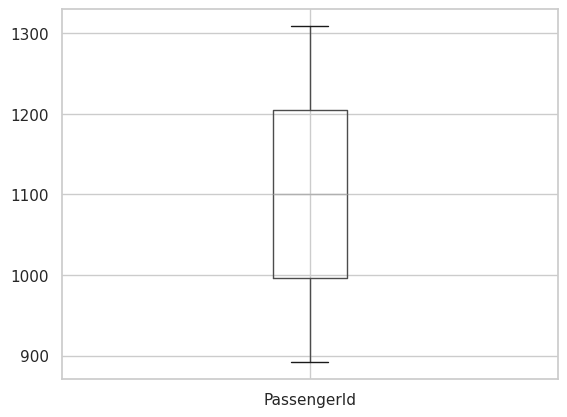

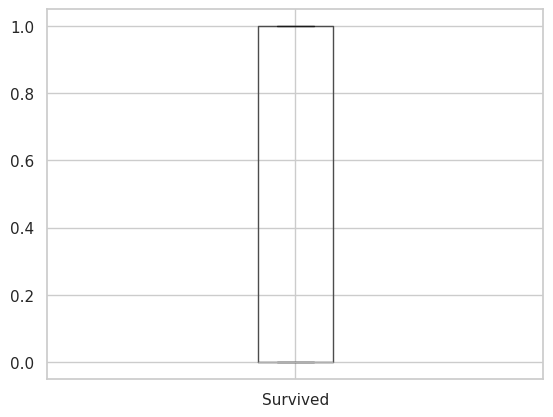

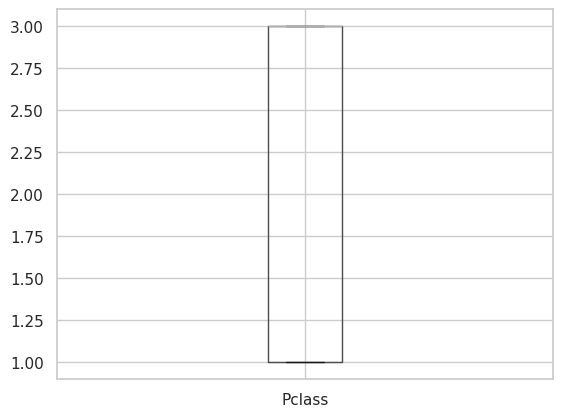

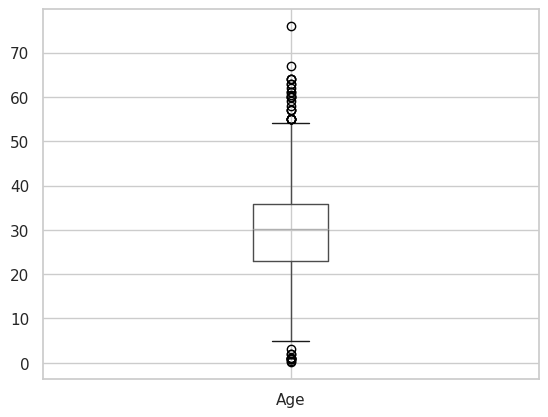

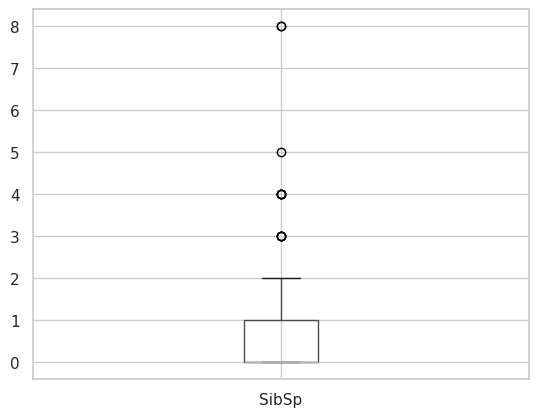

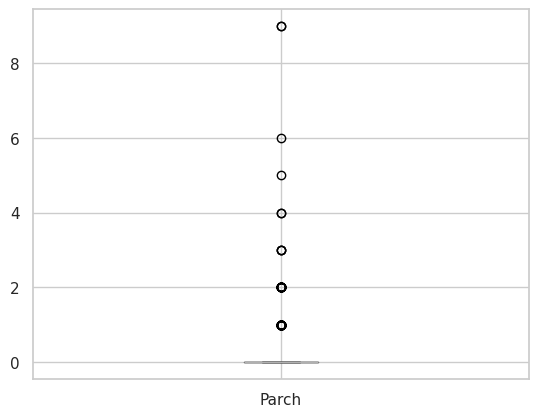

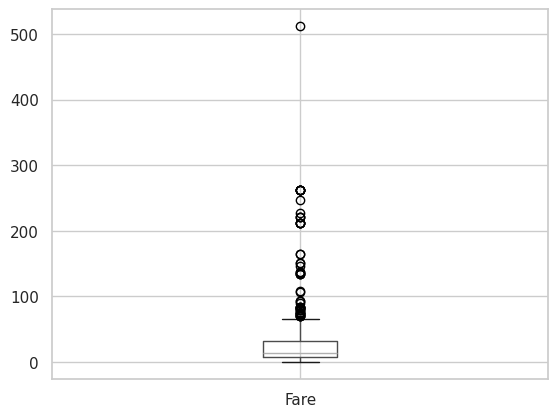

In [ ]:
for col in numerical_cols:
  titanic_df.boxplot(column=col)
  plt.show()

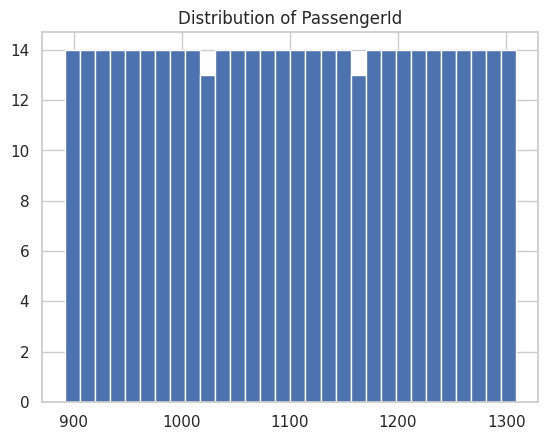

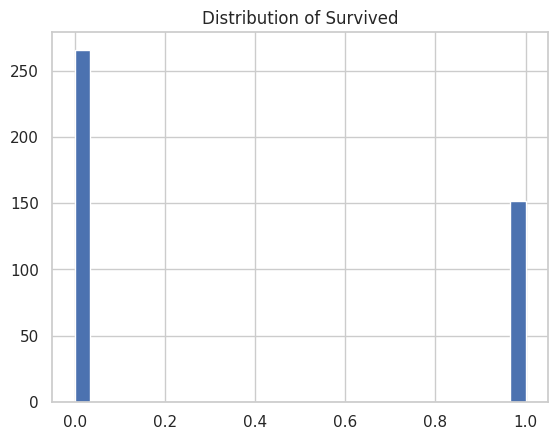

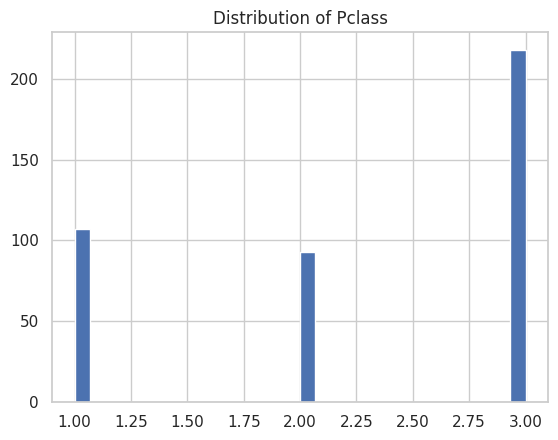

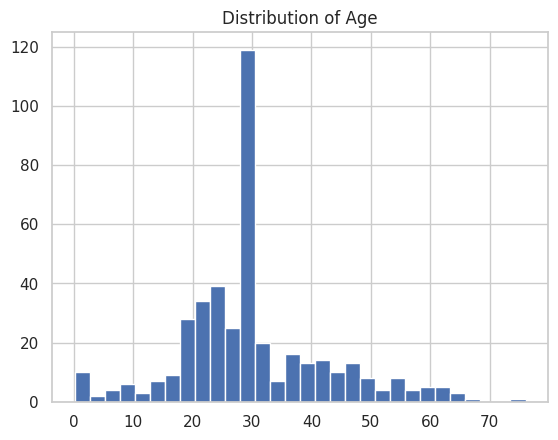

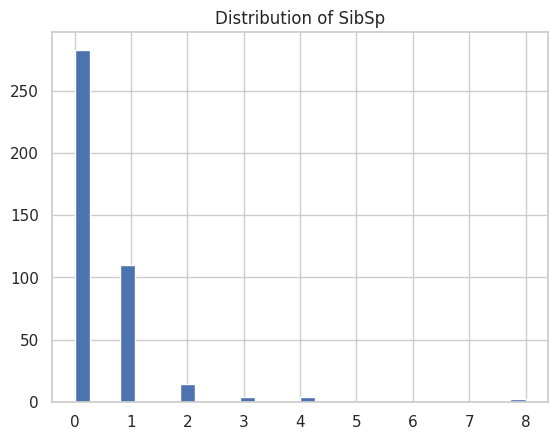

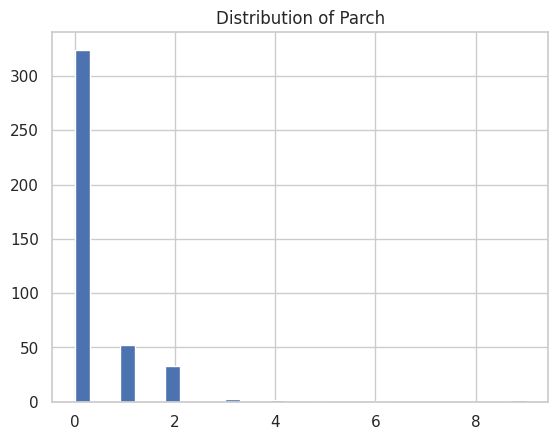

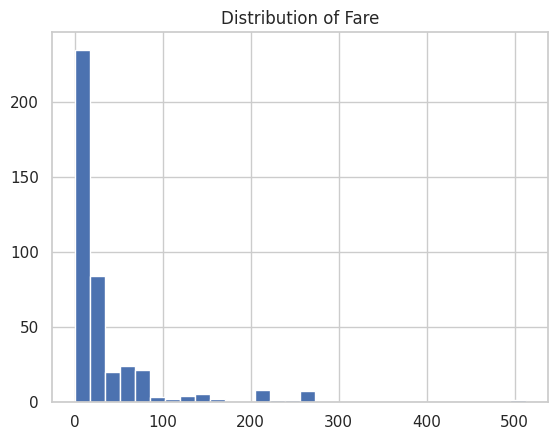

In [ ]:
for col in numerical_cols:
  titanic_df[col].hist(bins=30)
  plt.title(f"Distribution of {col}")
  plt.show()


For Fare

In [ ]:
import numpy as np

In [ ]:
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
Fare_outliers = titanic_df[(titanic_df['Fare'] < lower_bound) | (titanic_df['Fare'] > upper_bound)]
print(Fare_outliers)

#Replace with the bounds
titanic_df['Fare'] = np.where(titanic_df['Fare'] > upper_bound, upper_bound,
                             np.where(titanic_df['Fare'] < lower_bound, lower_bound, titanic_df['Fare']))



     PassengerId  Survived  Pclass  \
12           904         1       1   
24           916         1       1   
48           940         1       1   
53           945         1       1   
59           951         1       1   
64           956         0       1   
69           961         1       1   
74           966         1       1   
75           967         0       1   
81           973         0       1   
96           988         1       1   
114         1006         1       1   
118         1010         0       1   
141         1033         1       1   
142         1034         0       1   
150         1042         1       1   
156         1048         1       1   
179         1071         1       1   
181         1073         0       1   
184         1076         1       1   
188         1080         1       3   
196         1088         0       1   
202         1094         0       1   
212         1104         0       2   
217         1109         0       1   
218         

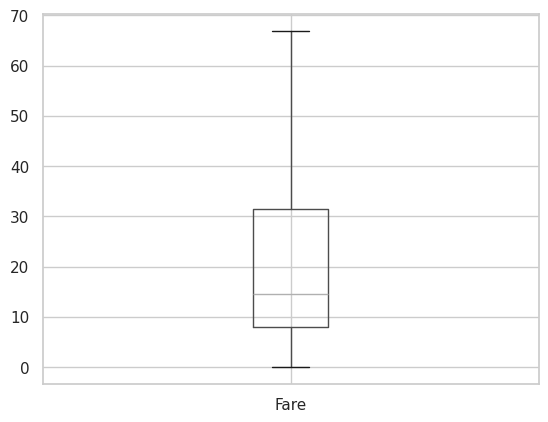

In [ ]:
titanic_df.boxplot(column='Fare')
plt.show()

For Parch column

In [ ]:
Q1 = titanic_df['Parch'].quantile(0.25)
Q3 = titanic_df['Parch'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
Parch_outliers = titanic_df[(titanic_df['Parch'] < lower_bound) | (titanic_df['Parch'] > upper_bound)]
print(Parch_outliers)

#Replace with the bounds
titanic_df['Parch'] = np.where(titanic_df['Parch'] > upper_bound, upper_bound,
                             np.where(titanic_df['Parch'] < lower_bound, lower_bound, titanic_df['Parch']))



     PassengerId  Survived  Pclass  \
4            896         1       3   
7            899         0       2   
21           913         0       3   
23           915         0       1   
24           916         1       1   
..           ...       ...     ...   
397         1289         1       1   
402         1294         1       1   
407         1299         0       1   
409         1301         1       3   
417         1309         0       3   

                                                  Name     Sex        Age  \
4         Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.000000   
7                         Caldwell, Mr. Albert Francis    male  26.000000   
21                           Olsen, Master. Artur Karl    male   9.000000   
23                     Williams, Mr. Richard Norris II    male  21.000000   
24     Ryerson, Mrs. Arthur Larned (Emily Maria Borie)  female  48.000000   
..                                                 ...     ...        ...   
397 

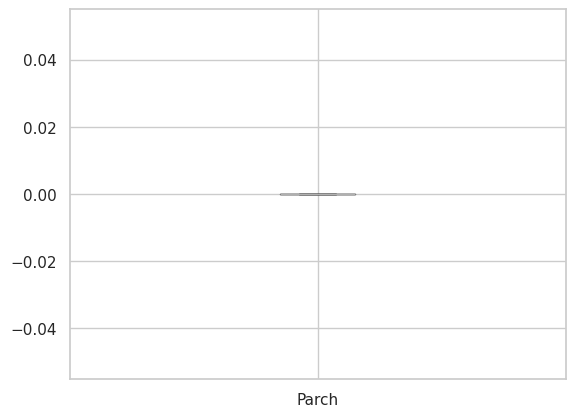

In [ ]:
titanic_df.boxplot(column='Parch')
plt.show()

For SibSp column

In [ ]:
Q1 = titanic_df['SibSp'].quantile(0.25)
Q3 = titanic_df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
SibSp_outliers = titanic_df[(titanic_df['SibSp'] < lower_bound) | (titanic_df['SibSp'] > upper_bound)]
print(SibSp_outliers)

#Replace with the bounds
titanic_df['SibSp'] = np.where(titanic_df['SibSp'] > upper_bound, upper_bound,
                             np.where(titanic_df['SibSp'] < lower_bound, lower_bound, titanic_df['SibSp']))



     PassengerId  Survived  Pclass                                    Name  \
53           945         1       1              Fortune, Miss. Ethel Flora   
55           947         0       3                    Rice, Master. Albert   
140         1032         1       3             Goodwin, Miss. Jessie Allis   
145         1037         0       3               Vander Planke, Mr. Julius   
154         1046         0       3            Asplund, Master. Filip Oscar   
188         1080         1       3                         Sage, Miss. Ada   
214         1106         1       3  Andersson, Miss. Ida Augusta Margareta   
360         1252         0       3             Sage, Master. William Henry   
379         1271         0       3             Asplund, Master. Carl Edgar   
389         1281         0       3             Palsson, Master. Paul Folke   
394         1286         0       3                Kink-Heilmann, Mr. Anton   

        Sex        Age  SibSp  Parch    Ticket     Fare        

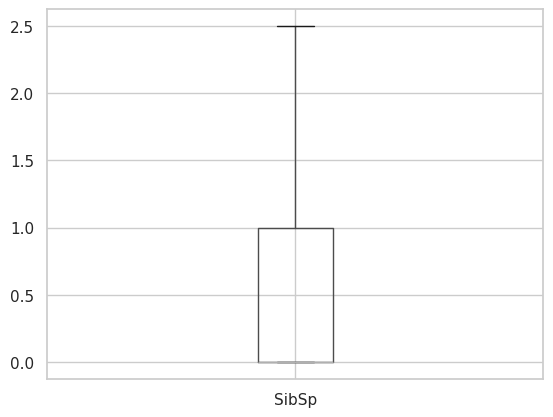

In [ ]:
titanic_df.boxplot(column='SibSp')
plt.show()

For Age column

In [ ]:
Q1 = titanic_df['Age'].quantile(0.25)
Q3 = titanic_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
Age_outliers = titanic_df[(titanic_df['Age'] < lower_bound) | (titanic_df['Age'] > upper_bound)]
print(Age_outliers)

#Replace with the bounds
titanic_df['Age'] = np.where(titanic_df['Age'] > upper_bound, upper_bound,
                             np.where(titanic_df['Age'] < lower_bound, lower_bound, titanic_df['Age']))



     PassengerId  Survived  Pclass  \
2            894         0       2   
13           905         0       2   
20           912         0       1   
48           940         1       1   
69           961         1       1   
77           969         1       1   
81           973         0       1   
89           981         0       2   
96           988         1       1   
114         1006         1       1   
117         1009         1       3   
142         1034         0       1   
152         1044         0       3   
179         1071         1       1   
193         1085         0       2   
201         1093         0       3   
213         1105         1       2   
217         1109         0       1   
236         1128         0       1   
240         1132         1       1   
250         1142         1       2   
263         1155         1       3   
281         1173         0       3   
284         1176         1       3   
296         1188         1       2   
305         

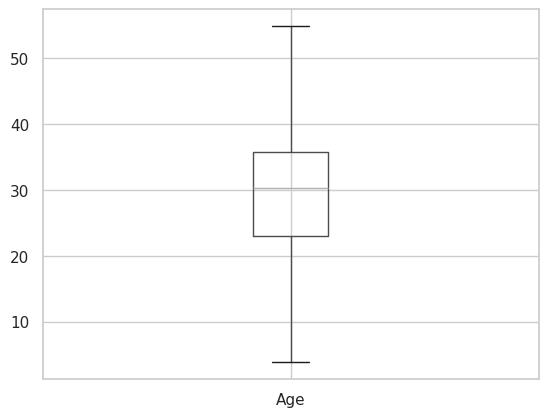

In [ ]:
titanic_df.boxplot(column='Age')
plt.show()

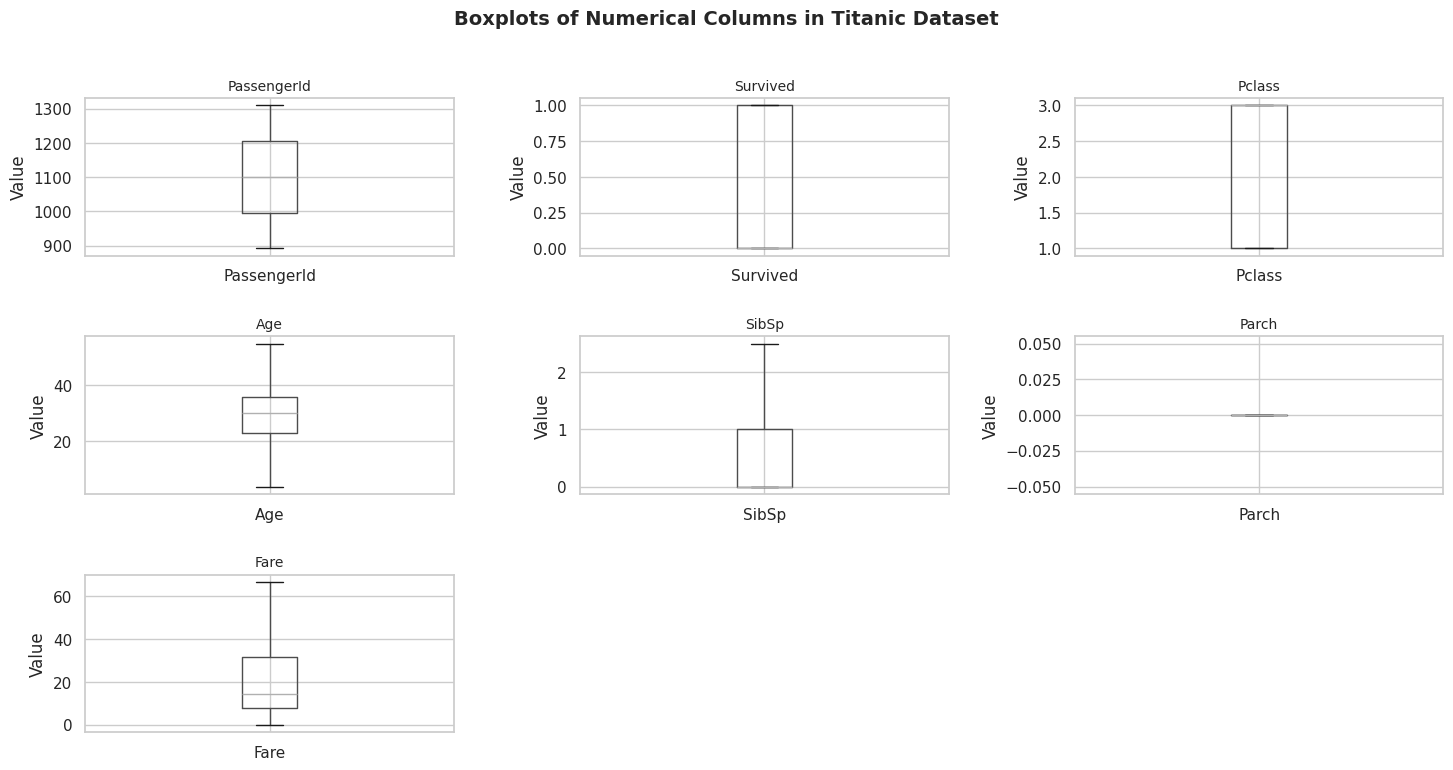

In [ ]:
# Define number of rows and columns for subplots
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)
# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))  # adjust figsize as needed
axes = axes.flatten()  # make axes iterable
# Plot each numerical column
for i, col in enumerate(numerical_cols):
    titanic_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel('Value')
# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add an overall title
fig.suptitle("Boxplots of Numerical Columns in Titanic Dataset", fontsize=14, fontweight='bold')
# Adjust spacing
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
titanic_df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0.0,0.0,347086,7.7750,Unknown,S
413,1305,0,3,"Spector, Mr. Woolf",male,30.272732,0.0,0.0,A.5. 3236,8.0500,Unknown,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0.0,0.0,PC 17758,66.9063,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0.0,0.0,SOTON/O.Q. 3101262,7.2500,Unknown,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.272732,0.0,0.0,359309,8.0500,Unknown,S
417,1309,0,3,"Peter, Master. Michael J",male,30.272732,1.0,0.0,2668,22.3583,Unknown,C


In [ ]:
# Define the path where you want to save
file_path = '/content/drive/My Drive/DEEP LEARNING NOTEBOOKS/SUPERVISED MACHINE LEARNING/CLASSIFICATION ALGORITHMS/cleaned_titanic_df.csv'

# Save as CSV
titanic_df.to_csv(file_path, index=False)

print("✅ File saved successfully to:", file_path)


✅ File saved successfully to: /content/drive/My Drive/DEEP LEARNING NOTEBOOKS/SUPERVISED MACHINE LEARNING/CLASSIFICATION ALGORITHMS/cleaned_titanic_df.csv


In [ ]:
# file_path_xlsx = '/content/drive/My Drive/cleaned_titanic_df.xlsx'
# titanic_df.to_excel(file_path_xlsx, index=False)

# Visualizing Relationships

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING NOTEBOOKS/SUPERVISED MACHINE LEARNING/CLASSIFICATION ALGORITHMS/TITANIC DATA CLASSIFICATION/cleaned_titanic_df.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.500,0.0,0.0,330911,7.8292,Unknown,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1.0,0.0,363272,7.0000,Unknown,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,54.875,0.0,0.0,240276,9.6875,Unknown,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.000,0.0,0.0,315154,8.6625,Unknown,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1.0,0.0,3101298,12.2875,Unknown,S


In [ ]:
# Optional: Set a clean visual style
sns.set(style="whitegrid")

# Detect categorical and continuous columns automatically
categorical_cols = titanic_data.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = titanic_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Continuous columns:", continuous_cols)

Categorical columns: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Continuous columns: ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
continuous_cols.remove('PassengerId')

In [ ]:
categorical_cols.remove('Name')
categorical_cols.remove('Cabin')
categorical_cols.remove('Ticket')


In [ ]:
titanic_data['Survived'] = titanic_data['Survived'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')


In [ ]:
print("Categorical columns:", categorical_cols)
print("Continuous columns:", continuous_cols)

Categorical columns: ['Survived', 'Pclass', 'Sex', 'Embarked']
Continuous columns: ['Age', 'SibSp', 'Parch', 'Fare']



📊 Continuous vs Continuous Relationships:


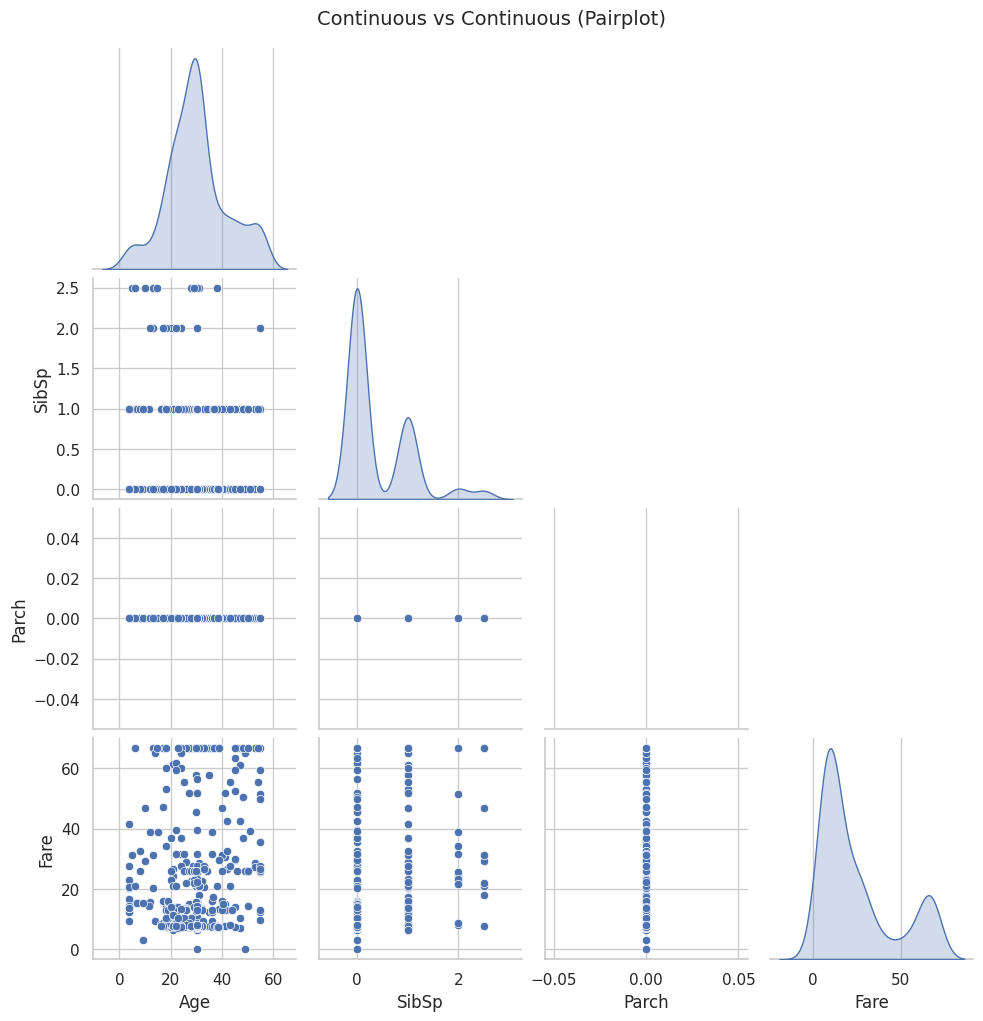

In [ ]:
# ------------------------------
# 1️⃣ Continuous vs Continuous
# ------------------------------
if len(continuous_cols) >= 2:
    print("\n📊 Continuous vs Continuous Relationships:")
    sns.pairplot(titanic_df[continuous_cols], diag_kind='kde', corner=True)
    plt.suptitle('Continuous vs Continuous (Pairplot)', y=1.02, fontsize=14)
    plt.show()
else:
    print("\n❌ Not enough continuous variables for pairplot.")

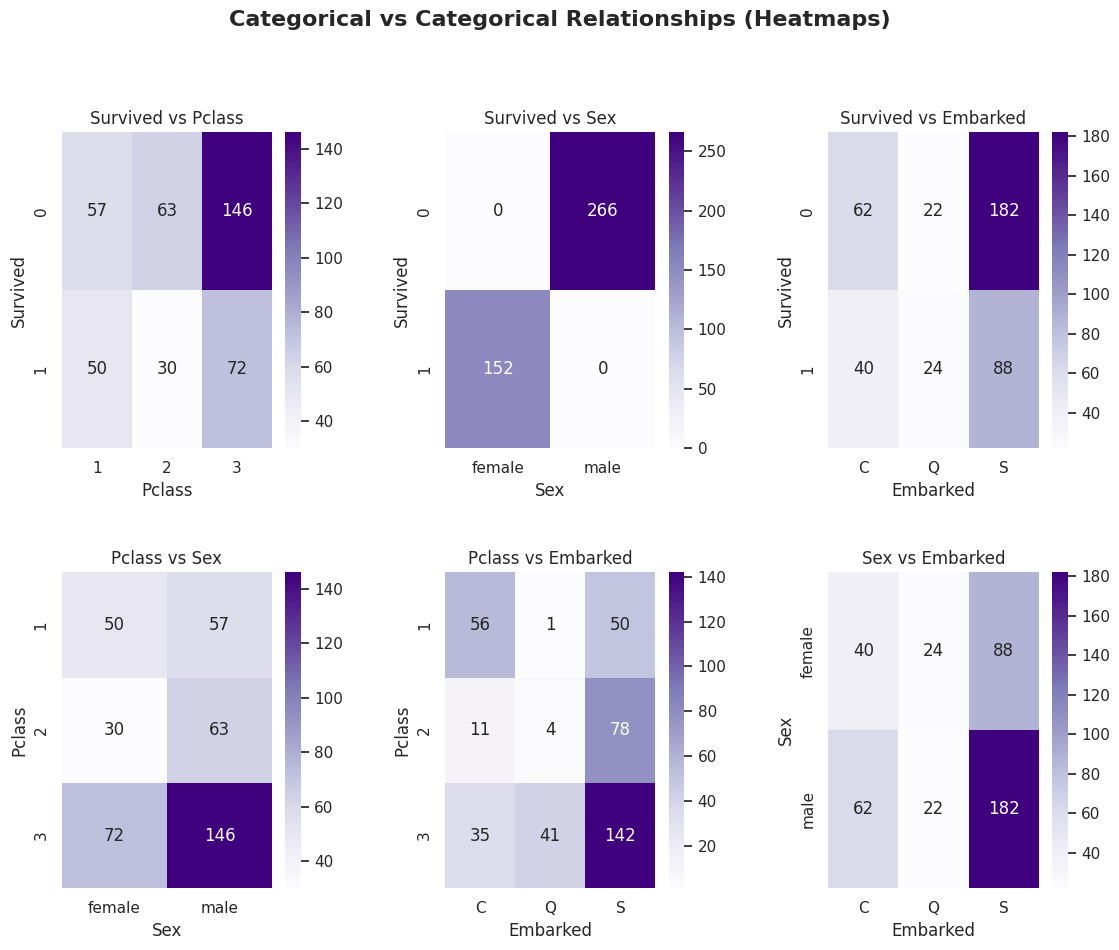

In [ ]:
# Create all unique pairs of categorical columns
cat_pairs = [(categorical_cols[i], categorical_cols[j])
             for i in range(len(categorical_cols))
             for j in range(i+1, len(categorical_cols))]

# Define grid size
n_cols = 3
n_rows = math.ceil(len(cat_pairs) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

# Plot each pair as a heatmap
for idx, (col1, col2) in enumerate(cat_pairs):
    ct = pd.crosstab(titanic_df[col1], titanic_df[col2])
    sns.heatmap(ct, annot=True, cmap='Purples', fmt='d', ax=axes[idx])
    axes[idx].set_title(f'{col1} vs {col2}')
    axes[idx].set_xlabel(col2)
    axes[idx].set_ylabel(col1)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Categorical vs Categorical Relationships (Heatmaps)', fontsize=16, fontweight='bold')
plt.tight_layout(pad=3)
plt.show()


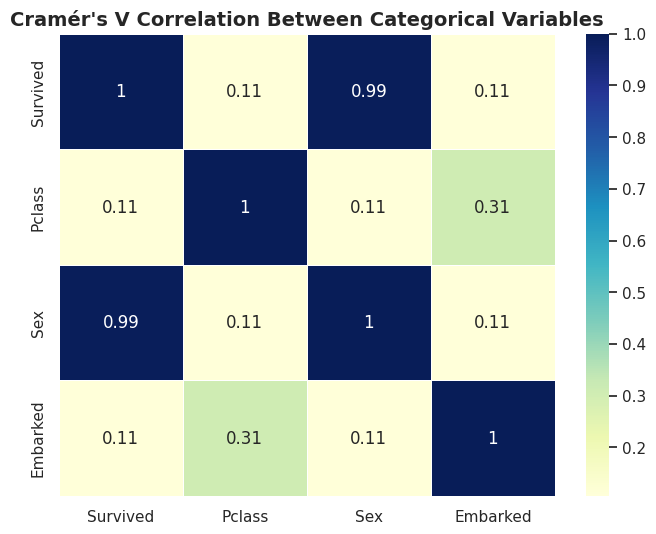

In [ ]:
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér’s V correlation matrix for all categorical variables
cat_corr = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cat_corr.loc[col1, col2] = 1.0
        else:
            cat_corr.loc[col1, col2] = cramers_v(titanic_df[col1], titanic_df[col2])

cat_corr = cat_corr.astype(float)

# Plot a single heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cat_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Cramér's V Correlation Between Categorical Variables", fontsize=14, fontweight='bold')
plt.show()


Continuous vs. Categorical

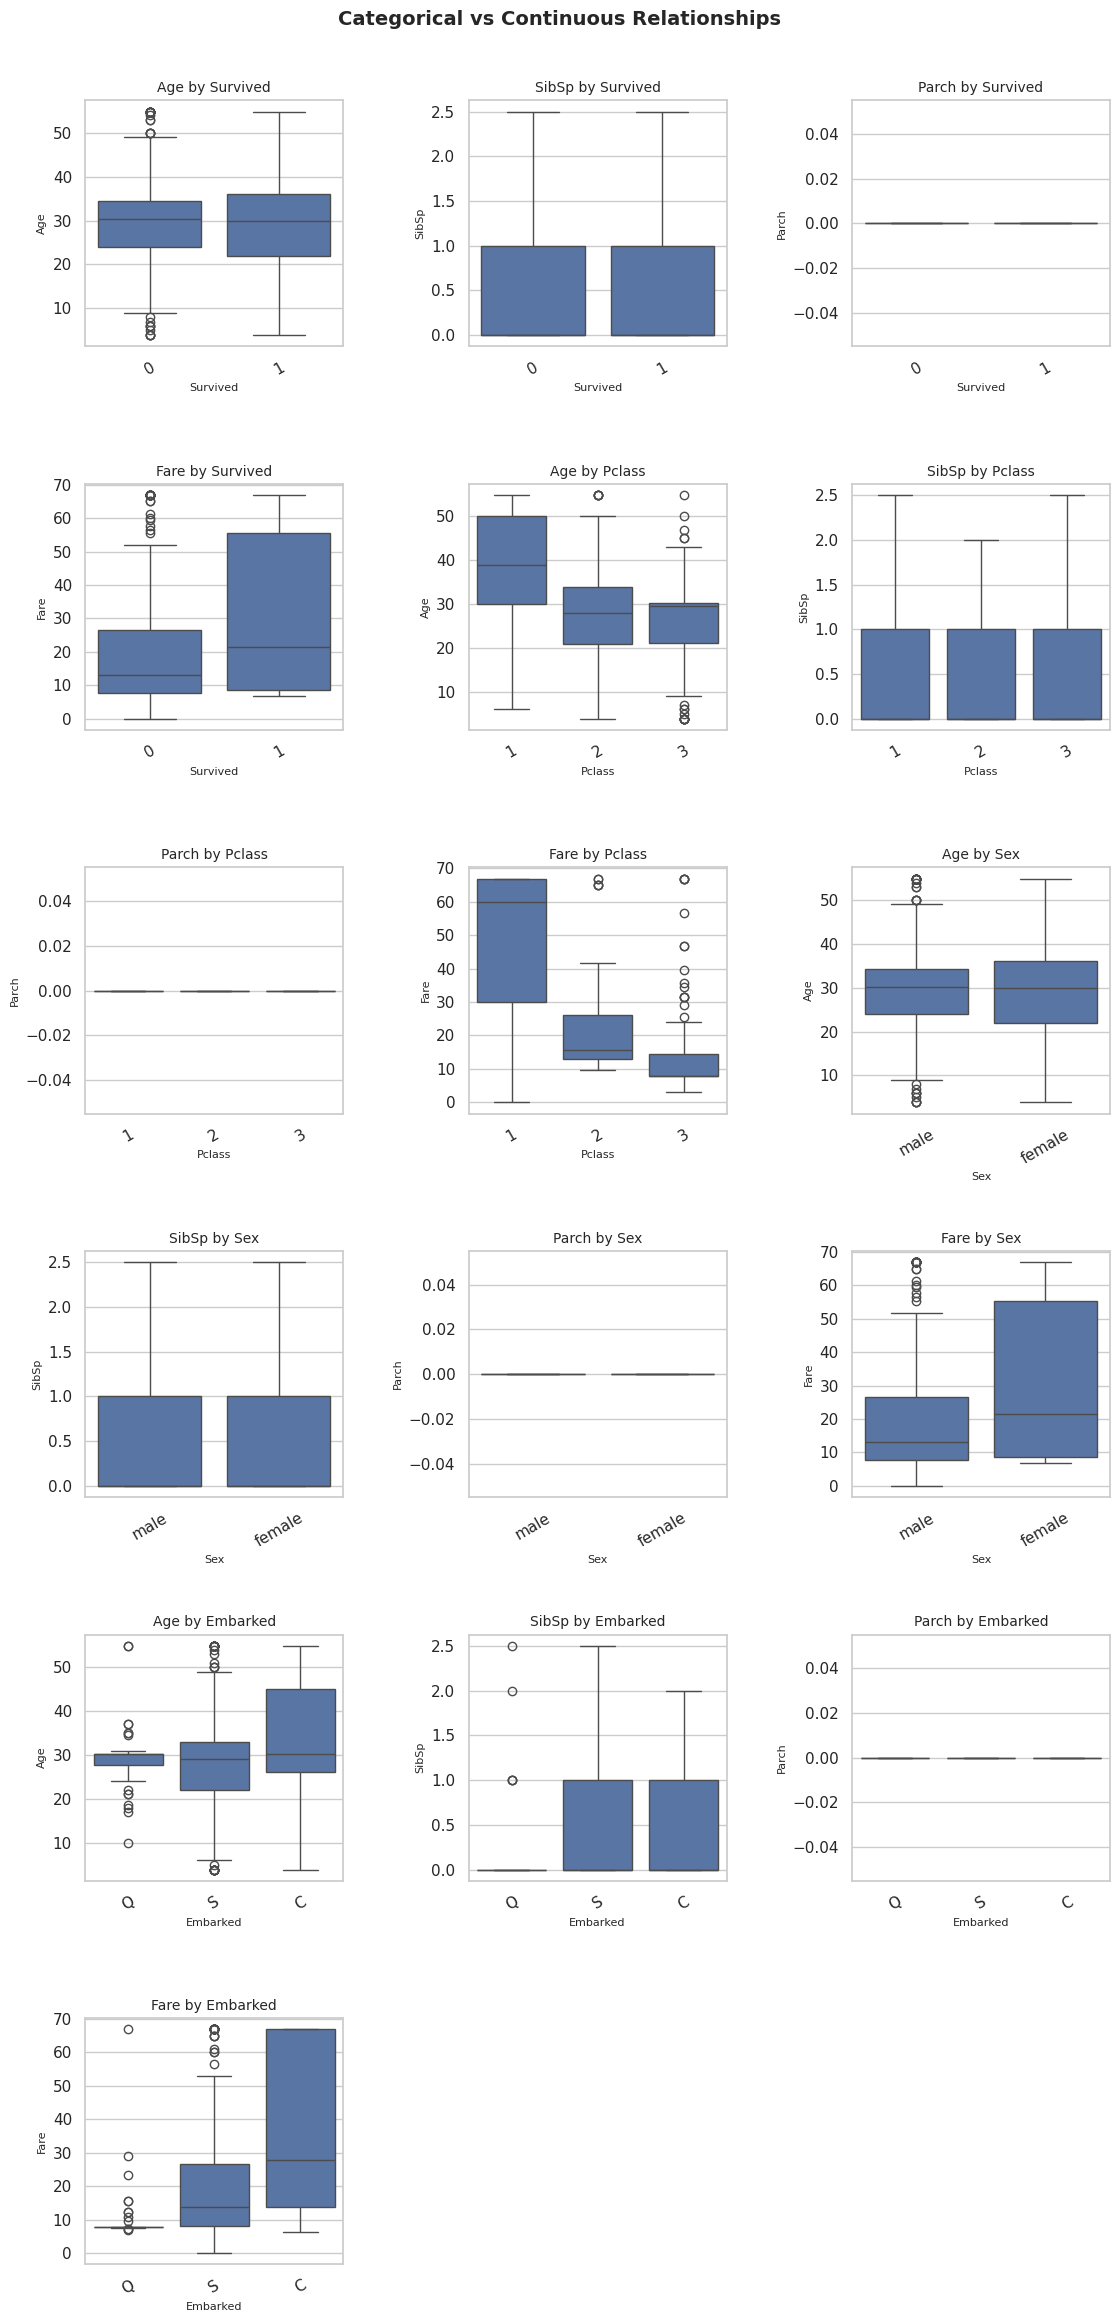

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # optional styling

# Create all categorical-continuous pairs
cat_cont_pairs = [(cat, cont) for cat in categorical_cols for cont in continuous_cols]

# Define grid size
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cat_cont_pairs) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Plot each pair
for i, (cat, cont) in enumerate(cat_cont_pairs):
    sns.boxplot(x=titanic_df[cat], y=titanic_df[cont], ax=axes[i])
    axes[i].set_title(f'{cont} by {cat}', fontsize=10)
    axes[i].set_xlabel(cat, fontsize=8)
    axes[i].set_ylabel(cont, fontsize=8)
    axes[i].tick_params(axis='x', rotation=30)  # rotate x labels for readability

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add an overall title
fig.suptitle("Categorical vs Continuous Relationships", fontsize=14, fontweight='bold')
plt.tight_layout(pad=3)
plt.show()


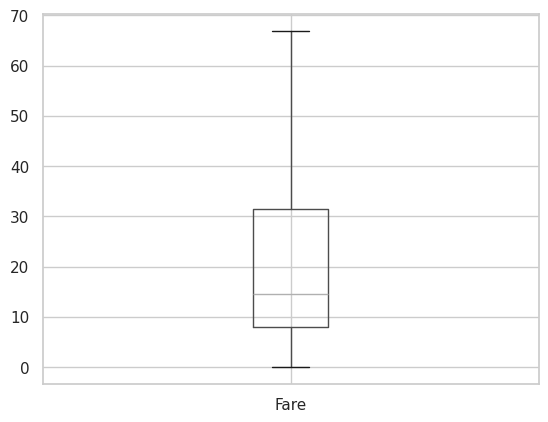

In [ ]:
titanic_data.boxplot(column='Fare')
plt.show()